# 2.2.1 Statistical learning: the setting and the estimator object in scikit-learn

* Data in 2D arrays
* 1st axis = samples axis
* 2nd axis = features axis

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [6]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [7]:
import pylab as pl

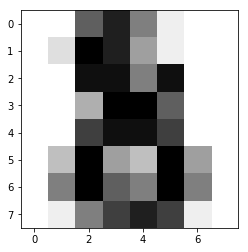

In [10]:
pl.imshow(digits.images[-1], cmap=pl.cm.gray_r)


In [11]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [12]:
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [20]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

## KNN classification example

In [21]:
# Split iris data into train and test data
# A random permutation to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))

In [23]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [25]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [27]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Linear model: from regression to sparcity

### Diabetes dataset

In [30]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/bartev/.virtualenvs/skl/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [38]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [39]:
# the mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) **2)

2004.5676026898218

explained variance score: 1 is perfect prediction
and 0 means that there is no linear relationship
between X and Y

In [40]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905724

### Shrinkage

if there are few data points per dimension, noise in the observations induces high variance

In [43]:
X = np.c_[0.5, 1].T
y = [0.5, 1]

In [44]:
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()

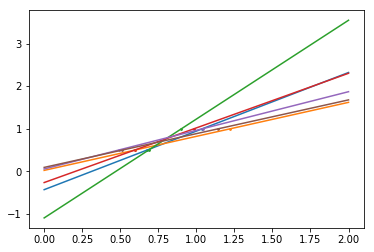

In [45]:
import pylab as pl
pl.figure

np.random.seed(0)
for _ in range(6):
    this_X = 0.1 * np.random.normal(size = (2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

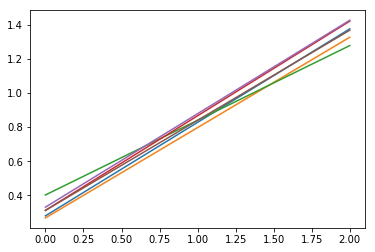

In [99]:
regr = linear_model.Ridge(alpha = 0.1)
pl.figure

np.random.seed(0)
for _ in range(6):
    this_X = 0.1 * np.random.normal(size = (2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    # pl.scatter(this_X, y, s=3)


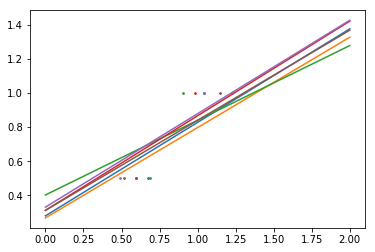

In [52]:
pl.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size = (2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s = 3)

In [54]:
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha).fit(diabetes_X_train,diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])                           

[0.58511106838835292, 0.58520730154446743, 0.58546775406984908, 0.58555120365039159, 0.58307170855541612, 0.570589994372801]


In [111]:
[(regr.set_params(alpha= alpha)
     .fit(diabetes_X_train, diabetes_y_train)
     .score(diabetes_X_test, diabetes_y_test)) for alpha in alphas]

[0.58511106838835292,
 0.58520730154446743,
 0.58546775406984908,
 0.58555120365039159,
 0.58307170855541612,
 0.570589994372801]

In [118]:
regr = linear_model.Lasso()
scores = [(regr.set_params(alpha = alpha)
               .fit(diabetes_X_train, diabetes_y_train)
               .score(diabetes_X_test, diabetes_y_test))
               for alpha in alphas]
scores

[0.58511910691622293,
 0.58524713649060489,
 0.58571895391793527,
 0.58730094854527415,
 0.58876224183092607,
 0.5828450029681681]

In [122]:
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [126]:
regr.coef_

array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])

## Logistic regression

$$
  y = \sigmoid(X \beta - \text{offset}) + \epsilon =
  \frac{1}{1 + \exp (-X \beta + \text{offset})) + \epsilon
$$

In [129]:
logistic = linear_model.LogisticRegression(C = 1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [135]:
logistic.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [136]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

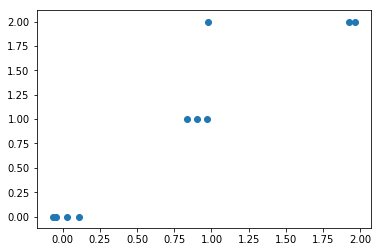

In [151]:
pl.figure()
pl.scatter(iris_y_test + jitter, logistic.predict(iris_X_test))


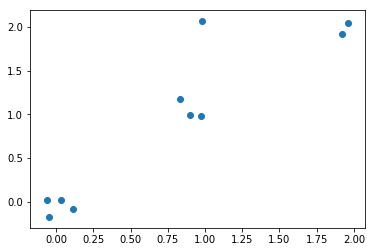

In [153]:
pl.figure()
pl.scatter(iris_y_test + jitter, logistic.predict(iris_X_test) + jitter_y)

In [152]:
jitter_x = np.random.normal(size=len(iris_y_test), scale = 0.1)
jitter_y = np.random.normal(size=len(iris_y_test), scale = 0.1)

## Exercise: classify digits

In [154]:
from sklearn import datasets, neighbors, linear_model

In [155]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [157]:
# Split iris data into train and test data
# A random permutation to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(X_digits))

In [159]:
num_test = len(X_digits) / 10

In [161]:
train_idx = indices[:-num_test]
test_idx = indices[-num_test:]

In [164]:
X_digits_train = X_digits[train_idx]
y_digits_train = y_digits[train_idx]
X_digits_test = X_digits[test_idx]
y_digits_test = y_digits[test_idx]

In [166]:
clf_linear = linear_model.LinearRegression()

In [168]:
clf_linear.fit(X_digits_train, y_digits_train)
pred_lin = clf_linear.predict(X_digits_test)

In [175]:
print ('score = ', clf_linear.score(X_digits_test, y_digits_test))
print ('msq = ', np.mean((pred_lin - y_digits_test) **2))

score =  0.659676192995
msq =  2.73102393511


In [179]:
clf_neigh = neighbors.NearestNeighbors(n_neighbors= 5, radius= 1.0)

In [183]:
neighbors.NearestNeighbors??

In [180]:
clf_neigh.fit(X_digits_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [182]:
clf_neigh.kneighbors(X = X_digits_test)

(array([[ 16.34013464,  17.77638883,  17.97220076,  18.76166304,
          19.36491673],
        [  7.54983444,  10.24695077,  11.3137085 ,  11.5758369 ,  12.9614814 ],
        [ 17.63519209,  17.8605711 ,  17.88854382,  18.54723699,  18.734994  ],
        [ 12.489996  ,  16.64331698,  16.85229955,  17.05872211,
          17.11724277],
        [  9.48683298,  10.        ,  11.35781669,  12.        ,
          12.16552506],
        [ 15.5241747 ,  17.63519209,  19.59591794,  20.        ,
          22.06807649],
        [ 14.56021978,  16.673332  ,  19.59591794,  19.72308292,
          20.14944168],
        [ 17.60681686,  17.88854382,  18.70828693,  19.07878403,
          20.04993766],
        [ 12.9614814 ,  13.41640786,  13.45362405,  13.85640646,
          13.92838828],
        [ 20.97617696,  21.72556098,  22.3383079 ,  23.        ,
          23.53720459],
        [ 22.53885534,  24.91987159,  25.49509757,  25.51470164,
          25.51470164],
        [ 12.4498996 ,  16.15549442,  1

## SVM

In [184]:
from sklearn import svm

In [185]:
svc = svm.SVC(kernel= 'linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)